In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation
import os
from skimage.measure import label, regionprops, regionprops_table

In [2]:
PATH_TO_IMAGES = '/mnt/sda2/coarse_segmentation/data/patches/augmented_coarse_wise/20x/8x8/test/'

list_of_patches = os.listdir(PATH_TO_IMAGES)    

In [13]:
# load the image
data = np.load(PATH_TO_IMAGES + list_of_patches[92])
image = data['arr_1']
mask = data['original_mask'] +1
pixel_mask = data['pixel_mask'] + 1

In [14]:
slic = segmentation.slic(image, n_segments=500, start_label=1, compactness=30)

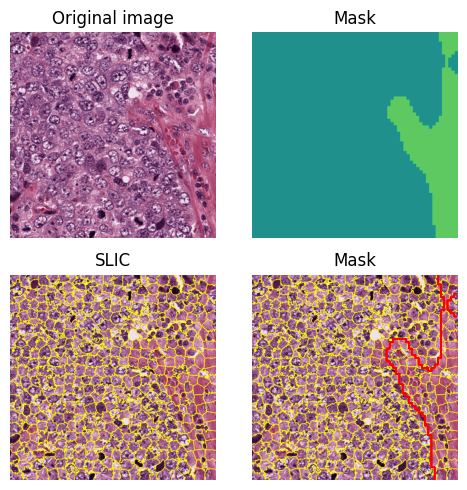

In [15]:
# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(5, 5))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(image)
ax1.set_title('Original image')

new_mask = np.copy(mask)
for c in range(5):
    new_mask[0,c] = c
    pixel_mask[0,c] = c

ax2.imshow(new_mask)
ax2.set_title('Mask')

ax3.imshow(segmentation.mark_boundaries(image, slic))
# ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title('SLIC')

ax4.imshow(segmentation.mark_boundaries(image, slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title('Mask')

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

In [16]:
refined_mask = np.ones_like(mask) * -1

for prop in regionprops(slic):
    
    # draw rectangle around segmented coins
    y0, x0 = prop.centroid

    # contains the image patch
    slic_label = slic[int(y0),int(x0)]
             
    # mask for the label
    temp_mask = slic == slic_label

    # find the max value in the mask
    mask_label = np.unique(mask[temp_mask])[np.argmax(np.unique(mask[temp_mask], return_counts=True)[1])]

    refined_mask[temp_mask] = mask_label

# fix the -1 situtation
negative_mask = refined_mask == -1
refined_mask[negative_mask] = mask[negative_mask]

# refined_mask[refined_mask == -1] = 0

print(np.unique(refined_mask, return_counts=True))
print(np.unique(mask, return_counts=True))

for c in range(5):
    refined_mask[0,c] = c

(array([2, 3], dtype=int16), array([221887,  40257]))
(array([2, 3], dtype=uint8), array([223424,  38720]))


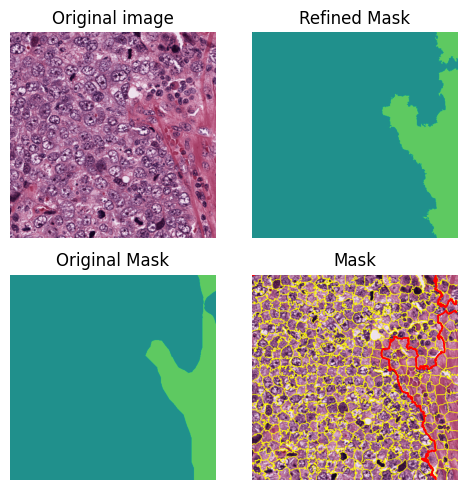

In [17]:
# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(5, 5))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(image)
ax1.set_title('Original image')

ax2.imshow(refined_mask)
ax2.set_title('Refined Mask')

ax3.imshow(pixel_mask)
# ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title('Original Mask')

ax4.imshow(segmentation.mark_boundaries(image, slic))
ax4.contour(refined_mask, colors='red', linewidths=1)
ax4.set_title('Mask')

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()